Importing necessary libraries

In [3]:
# Linear Algebra
import numpy as np

# Data Preprocessing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Modelling
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

Importing the source files

In [4]:
# import files from kaggle downloaded
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

Basic overview of the Dataset

In [5]:
# first 5 rows of calories.csv
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# first 5 rows of exercise.csv
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# checking on data size
print("Calories.csv has " , calories.shape[0]," instances and ",  calories.shape[1], " columns.")
print("Exercise.csv has " , exercise.shape[0]," instances and ",  exercise.shape[1], " columns.")

Calories.csv has  15000  instances and  2  columns.
Exercise.csv has  15000  instances and  8  columns.


Data Preparation

Knowing both database having the same instances and unique key, Databases will be merged

In [8]:
# Merging of 2 source files
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
# Information of new merged dataset
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
# Summary of blank value in the dataset

# Total counts of the missing value in the dataset
total = exercise_df.isnull().sum().sort_values(ascending=False)
percent_1 = exercise_df.isnull().sum()/exercise_df.isnull().count()*100

# Percentage of the missing value in the dataset in descending order
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Percentage of the data completeness
percent_3 = 100 - percent_2

# Creating a table to Concatenate both created Variables
missing_data = pd.concat([total, percent_2, percent_3], axis=1, keys=['Total blank Counts', 
                                                                      'Percentage of blank values %','Percentage of Data completeness %'])

# Preview the table of overview to the blank data in dataset
print(missing_data)

            Total blank Counts  Percentage of blank values %  \
User_ID                      0                           0.0   
Gender                       0                           0.0   
Age                          0                           0.0   
Height                       0                           0.0   
Weight                       0                           0.0   
Duration                     0                           0.0   
Heart_Rate                   0                           0.0   
Body_Temp                    0                           0.0   
Calories                     0                           0.0   

            Percentage of Data completeness %  
User_ID                                 100.0  
Gender                                  100.0  
Age                                     100.0  
Height                                  100.0  
Weight                                  100.0  
Duration                                100.0  
Heart_Rate             

In [11]:
# Duplication check in the dataset
print("The shape of dataset before dropping duplicates : " , exercise_df.shape)

# Keeping the first example of duplicates in 'User_ID' column.
exercise_df.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)  
print("The shape of dataset after dropping duplicates : " , exercise_df.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In [12]:
# Removal of User_ID
exercise_df.drop(columns = "User_ID" , inplace = True)
# Preview of the dataset after removal
exercise_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
# Data Splitting
exercise_train_data , exercise_test_data = train_test_split(exercise_df , test_size = 0.2 , random_state = 1)
print("Shape of training data : " , exercise_train_data.shape)
print("Shape of test data : " , exercise_test_data.shape)

Shape of training data :  (12000, 8)
Shape of test data :  (3000, 8)


In [14]:
# Descriptive Statistic of Overall Dataset
print('Descriptive Statistic of Overall Dataset')
exercise_df.describe()

Descriptive Statistic of Overall Dataset


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
# Descriptive Statistic of train dataset
print('Descriptive Statistic of Train Dataset')
exercise_train_data.describe()

Descriptive Statistic of Train Dataset


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,42.656000,174.426000,74.908833,15.520083,95.495917,40.023900,89.308000
std,16.932436,14.236464,15.012455,8.316872,9.554829,0.779914,62.226038
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,174.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,86.000000,23.000000,103.000000,40.600000,137.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,289.000000


In [16]:
# Descriptive Statistic of test dataset
print('Descriptive Statistic of Test Dataset')
exercise_test_data.describe()

Descriptive Statistic of Test Dataset


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,43.32500,174.621667,75.199000,15.572667,95.609000,40.031667,90.465667
std,17.16266,14.345701,15.128396,8.329777,9.697567,0.776585,63.374350
min,20.00000,133.000000,41.000000,1.000000,69.000000,37.200000,1.000000
25%,28.00000,164.000000,63.000000,9.000000,88.000000,39.600000,36.000000
50%,40.00000,175.000000,74.000000,15.000000,95.000000,40.200000,78.500000
75%,57.00000,185.000000,87.000000,23.000000,103.000000,40.600000,139.000000
max,79.00000,214.000000,124.000000,30.000000,125.000000,41.400000,314.000000


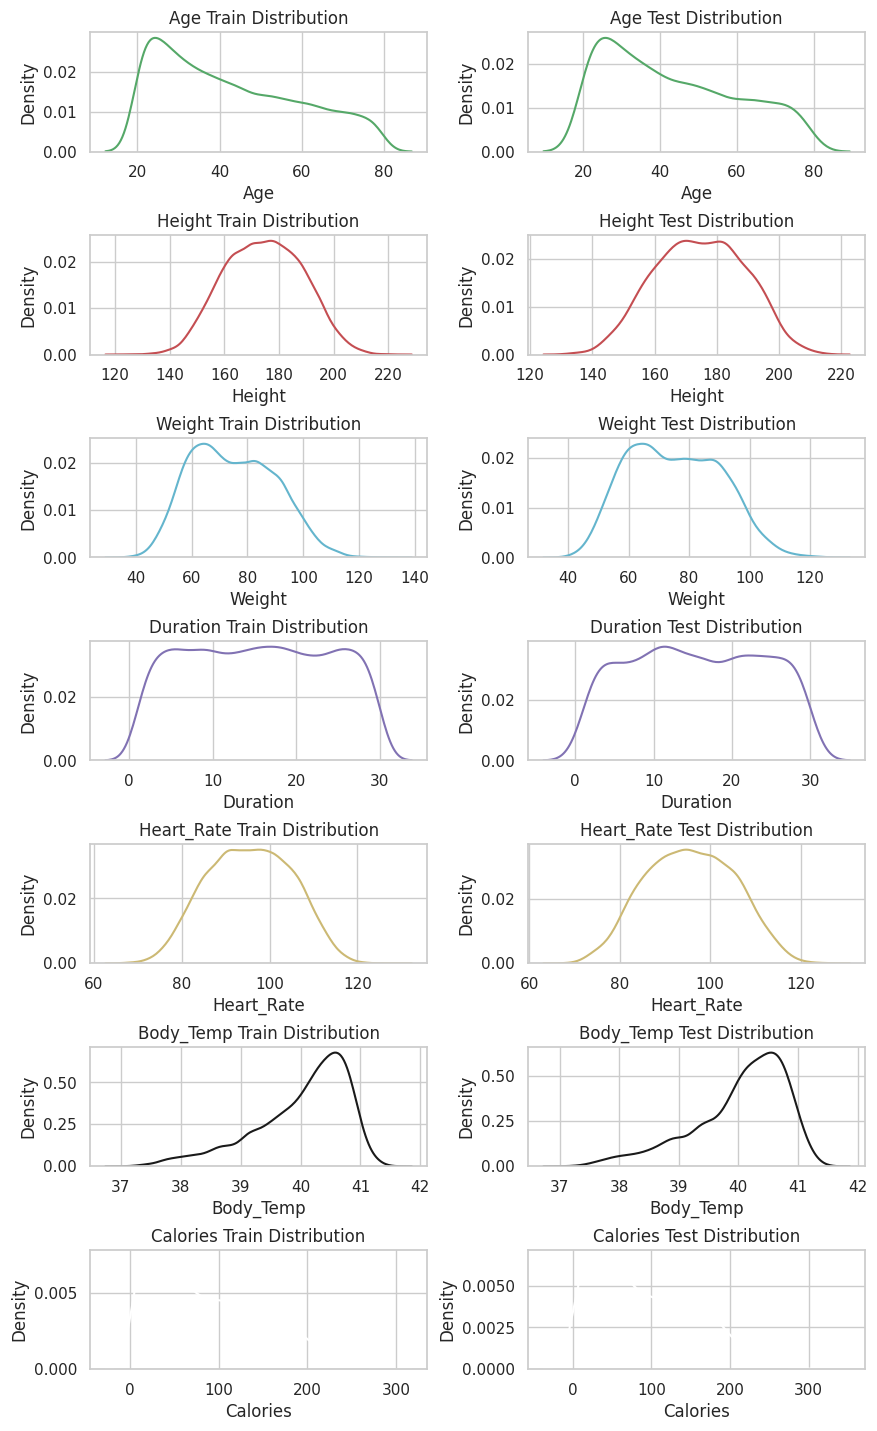

In [17]:
# Side-by-side Comparision of data distribution of both test and training set 
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(exercise_train_data.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
# for using axes indeces with one dimention array instead of two dimension
axes = axes.flatten()

for i , column , color in zip(range(0 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = exercise_train_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

for i , column , color in zip(range(1 , len(exercise_train_data.columns) * 2 , 2) , exercise_train_data.columns , c):
  try:
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = exercise_test_data , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

Feature Engineering

What is the min and max age in the datasets?
Minimum age in Train dataset is :  20
Maximum age in Train dataset is :  79
Minimum age in Test dataset is :  20
Maximum age in Test dataset is :  79


<Axes: xlabel='age_groups', ylabel='count'>

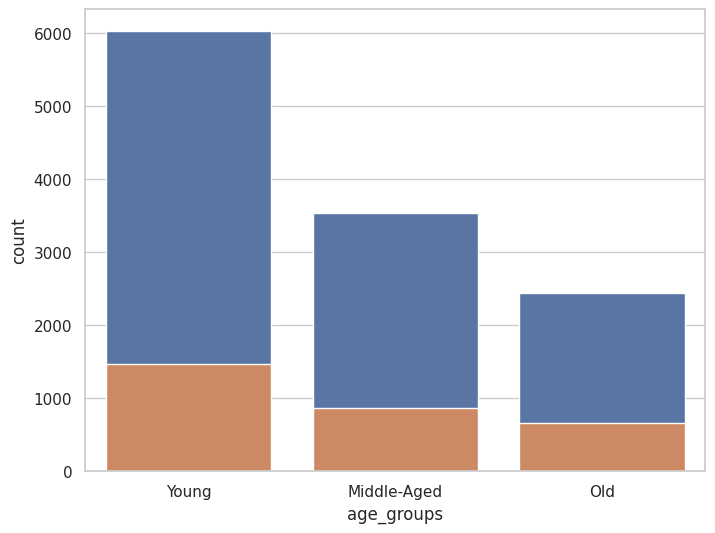

In [18]:
# To understand the min and max age in the datasets
print('What is the min and max age in the datasets?')
print('Minimum age in Train dataset is : ' , exercise_train_data["Age"].min())
print('Maximum age in Train dataset is : ' , exercise_train_data["Age"].max())
print('Minimum age in Test dataset is : ' , exercise_test_data["Age"].min())
print('Maximum age in Test dataset is : ' , exercise_test_data["Age"].max())

# Categorize the individual according to their ages
age_groups = ["Young" , "Middle-Aged" , "Old"]
exercise_train_data["age_groups"] = pd.cut(exercise_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
exercise_train_data["age_groups"].head()
exercise_test_data["age_groups"] = pd.cut(exercise_test_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
exercise_test_data["age_groups"].head()

# Show the count in each category
exercise_train_data["age_groups"].value_counts()
exercise_test_data["age_groups"].value_counts()

# Visualize the count in each category
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_train_data , x = "age_groups")
sns.countplot(data = exercise_test_data , x = "age_groups")

In [19]:
# Adding BMI column to both training and test sets
for data in [exercise_train_data , exercise_test_data]:
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [20]:
# Preview of train dataset
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle-Aged,22.99


In [21]:
# Preview of test dataset
exercise_test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI
7576,female,74,165.0,68.0,29.0,106.0,41.0,198.0,Old,24.98
10509,male,43,186.0,93.0,13.0,97.0,39.9,72.0,Middle-Aged,26.88
4253,female,43,148.0,52.0,29.0,108.0,40.5,195.0,Middle-Aged,23.74
5150,male,62,182.0,84.0,4.0,83.0,38.9,17.0,Old,25.36
506,female,37,173.0,67.0,15.0,94.0,40.0,74.0,Young,22.39


In [22]:
# Categorized the BMI into BMI_Categories
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)
exercise_test_data["Categorized_BMI"] = pd.cut(exercise_test_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

# converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column
exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object")
exercise_test_data["Categorized_BMI"] = exercise_test_data["Categorized_BMI"].astype("object")

In [23]:
# Preview of train dataset
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle-Aged,22.99,Normal


In [24]:
# Preview of test dataset
exercise_test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
7576,female,74,165.0,68.0,29.0,106.0,41.0,198.0,Old,24.98,Normal
10509,male,43,186.0,93.0,13.0,97.0,39.9,72.0,Middle-Aged,26.88,Overweight
4253,female,43,148.0,52.0,29.0,108.0,40.5,195.0,Middle-Aged,23.74,Normal
5150,male,62,182.0,84.0,4.0,83.0,38.9,17.0,Old,25.36,Overweight
506,female,37,173.0,67.0,15.0,94.0,40.0,74.0,Young,22.39,Normal


In [25]:
# Count for Categorized_BMI for train datasets
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,7819
1,Overweight,4181


In [26]:
# Count for Categorized_BMI for test datasets
ds = exercise_test_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,1922
1,Overweight,1078


<Axes: xlabel='Categorized_BMI', ylabel='Count'>

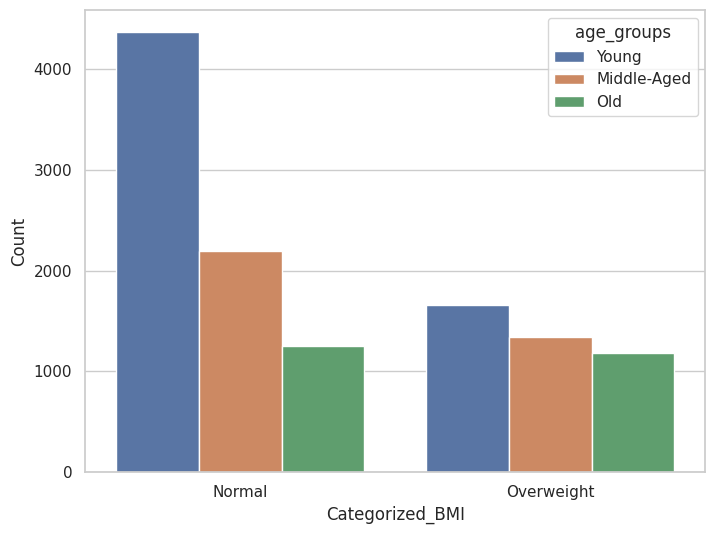

In [27]:
# Include the 2 new attributes for new insight
ds =exercise_train_data[["age_groups" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["age_groups" , "Categorized_BMI"])
ds.columns = ["age_groups" , "Categorized_BMI" , "Count"]
ds

# Visualization
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "age_groups")

In [28]:
# Data transformation for Gender

label_encoder = LabelEncoder()
exercise_train_data['Gender'] = label_encoder.fit_transform(exercise_train_data['Gender'])
exercise_test_data['Gender'] = label_encoder.fit_transform(exercise_test_data['Gender'])

In [29]:
# Preview of train dataset
# Female = 0, Male = 1
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,1,62,172.0,81.0,14.0,88.0,40.5,68.0,Old,27.38,Overweight
13352,1,77,182.0,83.0,28.0,108.0,40.8,241.0,Old,25.06,Overweight
13117,0,73,170.0,71.0,16.0,91.0,40.2,83.0,Old,24.57,Normal
2560,1,76,176.0,81.0,24.0,94.0,40.7,154.0,Old,26.15,Overweight
14297,1,42,183.0,77.0,7.0,93.0,39.8,32.0,Middle-Aged,22.99,Normal


In [30]:
# Preview of test dataset
# Female = 0, Male = 1
exercise_test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
7576,0,74,165.0,68.0,29.0,106.0,41.0,198.0,Old,24.98,Normal
10509,1,43,186.0,93.0,13.0,97.0,39.9,72.0,Middle-Aged,26.88,Overweight
4253,0,43,148.0,52.0,29.0,108.0,40.5,195.0,Middle-Aged,23.74,Normal
5150,1,62,182.0,84.0,4.0,83.0,38.9,17.0,Old,25.36,Overweight
506,0,37,173.0,67.0,15.0,94.0,40.0,74.0,Young,22.39,Normal


<Axes: >

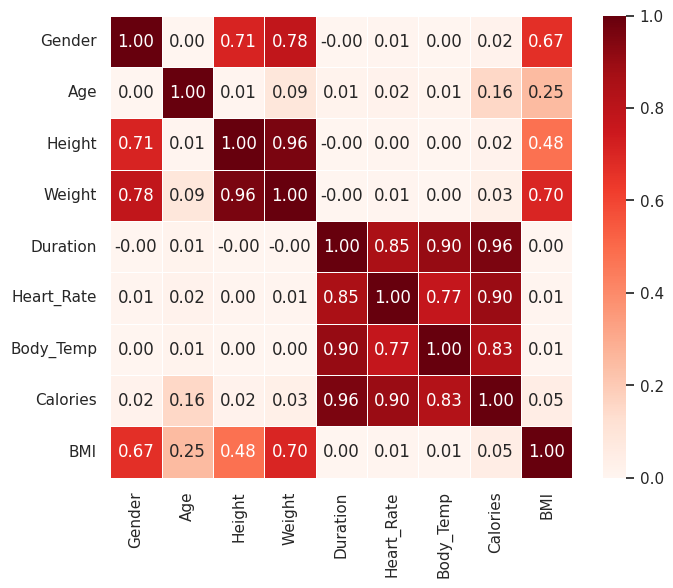

In [31]:
# Exclude the columns in categorical data
columns_to_exclude = ["age_groups", "Categorized_BMI"]
corr = exercise_train_data.drop(columns=columns_to_exclude).corr()

# Plotting the heat map to show Pearson Colleration
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(corr, annot=True, square=True, linewidth=.5, vmin=0, vmax=1, cmap='Reds', fmt='.2f')

In [32]:
# Feature selection
exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test_data = exercise_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]

# Feature dropping
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first = True)

In [33]:
# Preview of train dataset
# Female = 0, Male = 1
exercise_train_data.head()

,Gender,Age,BMI,Duration,Heart_Rate,Body_Temp,Calories
2643,1,62,27.38,14.0,88.0,40.5,68.0
13352,1,77,25.06,28.0,108.0,40.8,241.0
13117,0,73,24.57,16.0,91.0,40.2,83.0
2560,1,76,26.15,24.0,94.0,40.7,154.0
14297,1,42,22.99,7.0,93.0,39.8,32.0


In [34]:
# Preview of test dataset
# Female = 0, Male = 1
exercise_test_data.head()

,Gender,Age,BMI,Duration,Heart_Rate,Body_Temp,Calories
7576,0,74,24.98,29.0,106.0,41.0,198.0
10509,1,43,26.88,13.0,97.0,39.9,72.0
4253,0,43,23.74,29.0,108.0,40.5,195.0
5150,1,62,25.36,4.0,83.0,38.9,17.0
506,0,37,22.39,15.0,94.0,40.0,74.0


Data Modelling Phase

In [35]:
# Dropping calories (the target attribute in X_train and X_test)
X_train = exercise_train_data.drop("Calories" , axis = 1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories" , axis = 1)
y_test = exercise_test_data["Calories"]

In [36]:
# Visualizing the partitioning
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 6)
(3000, 6)
(12000,)
(3000,)


In [37]:
# Building Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train , y_train)
linreg_prediction = linreg.predict(X_test)

In [39]:
# Hyperparameter tuning for Random Forest Regression Model
forest_reg = RandomForestRegressor()
param_grid = {'n_estimators' : [10 , 100 , 1000] , 
              'max_features' : [2 , 2 , 3] , 
              'max_depth' : [2 , 4 , 6]}

grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , n_jobs = -1 , verbose = 3)
grid_search.fit(X_train , y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=2, max_features=2, n_estimators=10;, score=-447.364 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=2, n_estimators=10;, score=-458.314 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=2, n_estimators=10;, score=-400.915 total time=   0.1s
[CV 4/5] END max_depth=2, max_features=2, n_estimators=10;, score=-466.307 total time=   0.1s
[CV 5/5] END max_depth=2, max_features=2, n_estimators=10;, score=-456.933 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=2, n_estimators=100;, score=-447.737 total time=   0.3s
[CV 1/5] END max_depth=2, max_features=2, n_estimators=100;, score=-403.347 total time=   0.3s
[CV 4/5] END max_depth=2, max_features=2, n_estimators=100;, score=-419.068 total time=   0.4s
[CV 3/5] END max_depth=2, max_features=2, n_estimators=100;, score=-416.318 total time=   0.4s
[CV 5/5] END max_depth=2, max_features=2, n_estimators=100;, score=-468.716 total time= 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [2, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [41]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 1000}

In [43]:
grid_search.best_estimator_


RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000)

In [48]:
# Building Random Forest Regression Model
random_reg = RandomForestRegressor(n_estimators = 1000 , max_features = 3 , max_depth = 6)
random_reg.fit(X_train , y_train)
random_reg_prediction = random_reg.predict(X_test)

Model Evaluation and Interpretation

In [49]:
# Linear Regression Model Evaluation Metrics
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , linreg_prediction) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , linreg_prediction) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , linreg_prediction)) , 2))

Linear Regression Mean Absolute Error(MAE) :  8.52
Linear Regression Mean Squared Error(MSE) :  140.08
Linear Regression Root Mean Squared Error(RMSE) :  11.84


In [50]:
# Random Forest Regression Model Evaluation Metrics
print("RandomForest Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , random_reg_prediction) , 2))
print("RandomForest Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , random_reg_prediction) , 2))
print("RandomForest Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test , random_reg_prediction)) , 2))


RandomForest Mean Absolute Error(MAE) :  5.33
RandomForest Mean Squared Error(MSE) :  68.97
RandomForest Root Mean Squared Error(RMSE) :  8.3


In summary, Random Forest Regression model outperforms the Linear Regression model in terms of all evaluation metrics (MAE, MSE, and RMSE). It provides more accurate predictions with lower deviations from the actual calorie expenditure values, making it the better choice for this specific prediction task.